In [11]:
%matplotlib inline
import random
from matplotlib import pyplot as plt
import numpy as np

In [21]:

def genData(n):  
    randPointx1 = random.uniform (-1, 1)
    randPointy1 = random.uniform (-1, 1)
    randPointx2 = random.uniform (-1, 1)
    randPointy2 = random.uniform (-1, 1)
    tempPoints = []
    tempTarget = [[randPointx1,randPointy1],[randPointx2,randPointy2]]
    for i in range(n):
        newx = random.uniform (-1, 1)
        newy = random.uniform (-1, 1)
        tempPoints += [[newx,newy,aboveOrBelow(randPointx1,randPointy1,randPointx2,randPointy2,newx,newy)]]
    return tempPoints,tempTarget

#My brain is booty when it's Math but I know what I wanted to do and Google is my best friend 
#https://math.stackexchange.com/questions/1435779/calculate-if-a-point-lies-above-or-below-or-right-to-left-of-a-line
def aboveOrBelow(x1,y1,x2,y2,px,py):
    if ((x2-x1)*(py-y1) - (y2-y1)*(px-x1)) >= 0 :
        return 1
    return -1

def plotGraph(data,target,w):
    for i in range(len(data)):
        if(data[i][2] >= 0):
            plt.plot(data[i][0],data[i][1],'ro')
        else:
            plt.plot(data[i][0],data[i][1],'bo')
    slope = (target[1][1]-target[0][1]) / (target[1][0]-target[0][0])
    intercept = target[0][1] - slope*target[0][0]
    arr = np.array([-1,1])
    plt.plot(arr, arr*slope + intercept, '--g') #our original unknown f(x)
    #https://stats.stackexchange.com/questions/169343/how-to-plot-the-or-function-along-with-the-decision-boundary-of-a-perceptron
    print(w[1],w[2])
    if(w[0] == 0):
        w[0] = 0.000000000001
    if(w[1] == 0):
        w[1] = 0.0000000000001
    if(w[2] == 0):
        w[2] = 0.00000000000001
    x = (-w[0] / w[1]) 
    y = (-w[0] / w[2])  
#     print(-w[0],w[1])
    print(y)
    d = y
    c = -y / x #throw error if -y = 0
    plt.plot(arr, c*arr + d , 'r' )

def func(x,w):
    #first x always be 1 
    return (1*w[0])+(x[0]*w[1])+(x[1]*w[2])

def sign(result):
    #if the result is >= 0 meaning it says that it guesses this point to be above the line, 0 otherwise. 
    if result >= 0:
        return 1
    return -1

def test(n,limit):
    w = [0.0,0.0,0.0]
    finish = False
    fail = False
    count = 0
    data,target = genData(n) 
    while(count < limit and not finish):
        random.shuffle(data)
        count += 1
#         print("new iteration")
        for d in data:
#             print(d)
#             print(d[2], checkValid(sign(d,w)))
            if d[2] != sign(f(d,w)):
                # w_i = w_i + x_i*y_i where x is the input, y is the g(x) , we have 2 input actually, 
                #x and y (in this case x = x_1, y = x_2) where our y is not y in the graph, but y as a result of g(x) 
                #whether it is below or above 
                w[0] = w[0] + 1*d[2]
                w[1] = w[1] + d[0]*d[2]
                w[2] = w[2] + d[1]*d[2]
                fail = True
                break
#         print(count, fail)
        if(fail):
            fail = False
        else:
            finish = True 
    return data,target,count,w

            
def prob(f,w,n):
    error = 0
    for i in range(0, n):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        if aboveOrBelow(f[0][0],f[0][1],f[1][0],f[1][1],x,y) != sign(func([x,y], w)):
            error += 1
    return float(error)/n
    
def sim(ntimes,npoints,niter):
    sumprob = 0
    sumiter = 0
    for t in range(ntimes):
        data,target,count,w = test(npoints,niter)
#         print(count)
        sumiter += count
        sumprob += prob(target,w,niter)
    plotGraph(data,target,w)
   
    plt.plot()
    print ("avg. num iter: " + str(sumiter/float(ntimes)) +"  avg. prob of error : " + str(sumprob/float(ntimes)))


# d,t,c,w = test(10,10);
# print(w)
# print(t)
# print(d)
# print(c)
# data_x,data_y,target = genData(10)
# plot(data_x,data_y,target)


3.0578179015547686 3.589361016022375
-0.27860112023732037
avg. num iter: 10.436  avg. prob of error : 0.11008699999999996
None


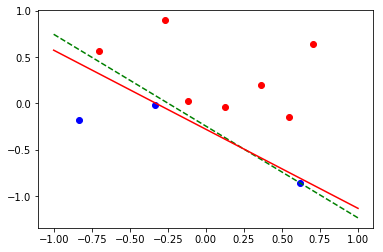

In [22]:
#question 8
print(sim(10000,10,1000));

1.1336291784838475
avg. num iter: 100.83  avg. prob of error : 0.01395799999999996
None


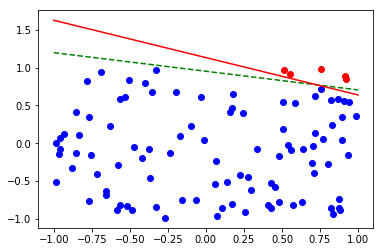

In [16]:
#question 9
print(sim(1000,100,1000));

done
-0.28465321728982024


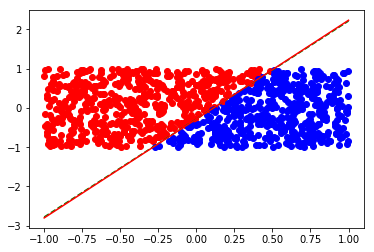

In [17]:
data,target,count, w = test(1000,1000);
print('done')
plotGraph(data,target,w);

In [ ]:
print('hey')